In [85]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [54]:
#dataset source: https://www.kaggle.com/datasets/mirichoi0218/insurance
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
#data understanding
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [57]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [59]:
df.isnull().sum()
df['age'].unique()
df['children'].unique()
df['smoker'].unique()
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

So there is 1338 records, distributed by 7 columns. It was detected one duplicate and the dataset presents outliers in the columns bmi and charges. There are not missing values nor errors detected so far. 

In [60]:
#data preparation; remove duplicate
df[df.duplicated()]
# added coment so the value isn't removed twice by mistake
df.drop(index=[581], inplace=True)

In [61]:
df.duplicated().sum()

0

# Plotting

In [62]:
categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi','children']

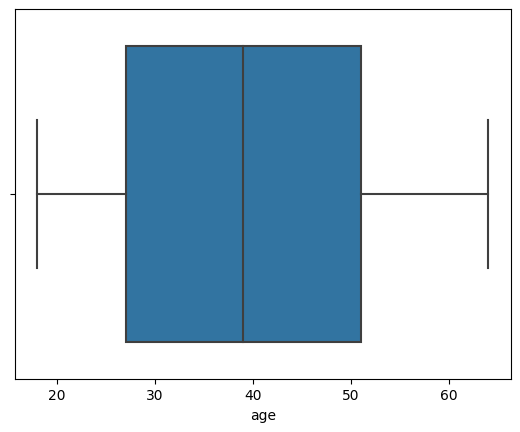

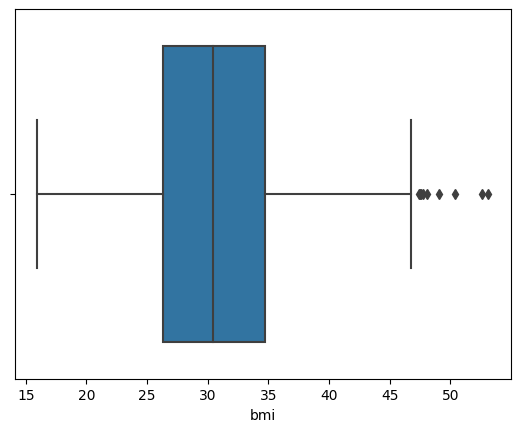

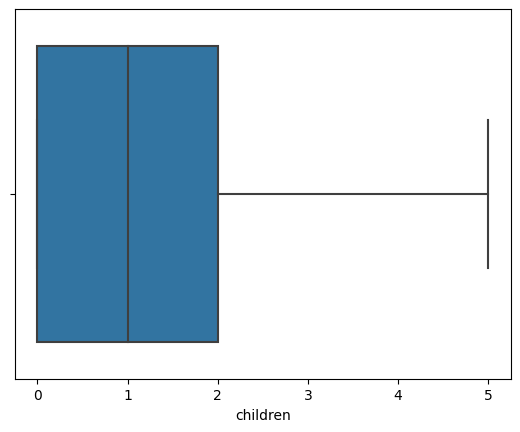

In [63]:
for n in numerical:
    sns.boxplot(x=df[n])
    plt.show()

<AxesSubplot:xlabel='charges'>

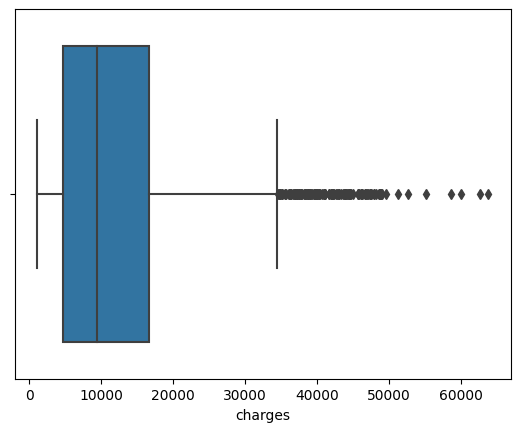

In [64]:
sns.boxplot(x=df['charges'])

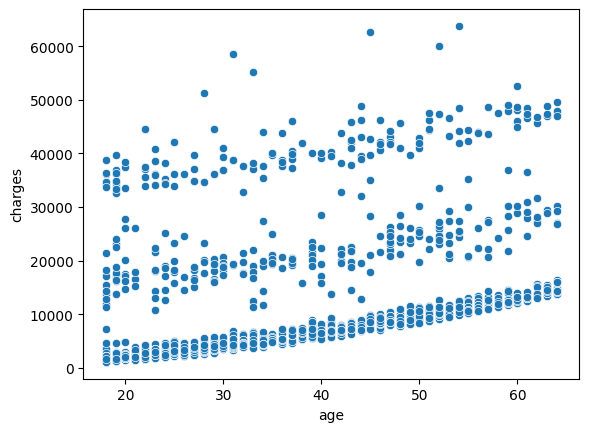

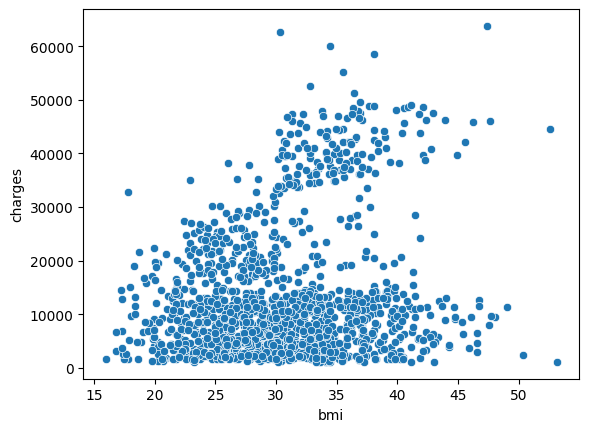

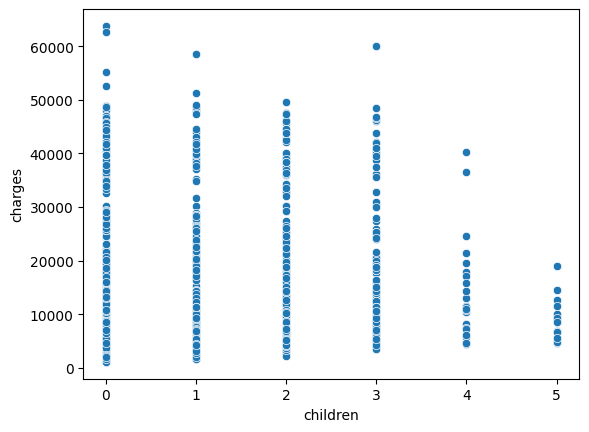

In [65]:
for n in numerical:
    sns.scatterplot(x=df[n], y=df['charges'])
    plt.show()

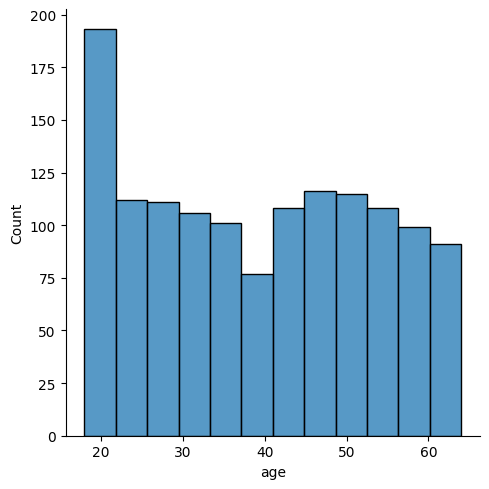

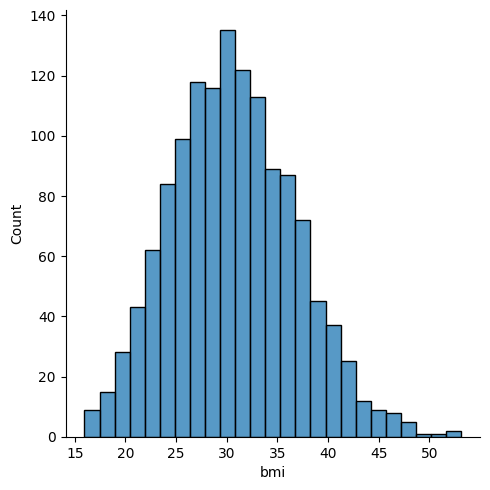

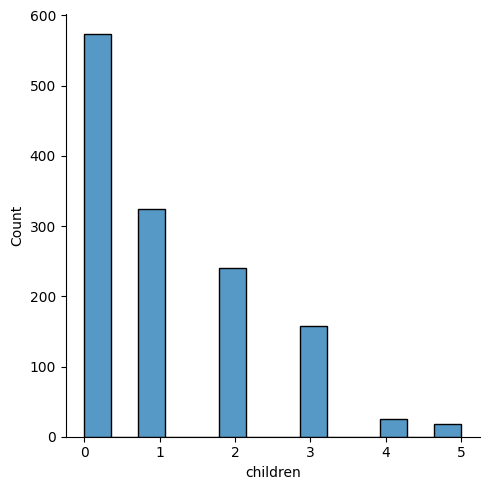

In [66]:
for n in numerical:
    sns.displot(x=df[n])
    plt.show()

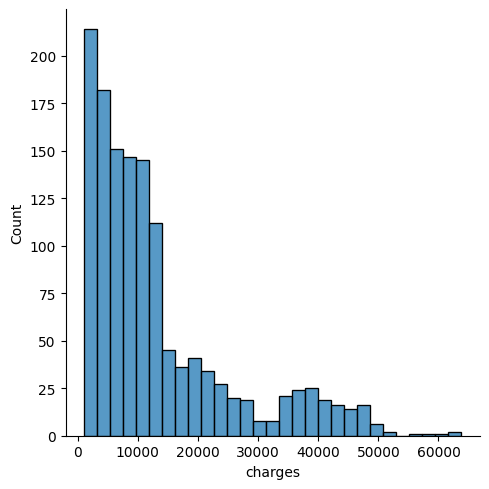

In [67]:
sns.displot(x=df['charges'])

<AxesSubplot:>

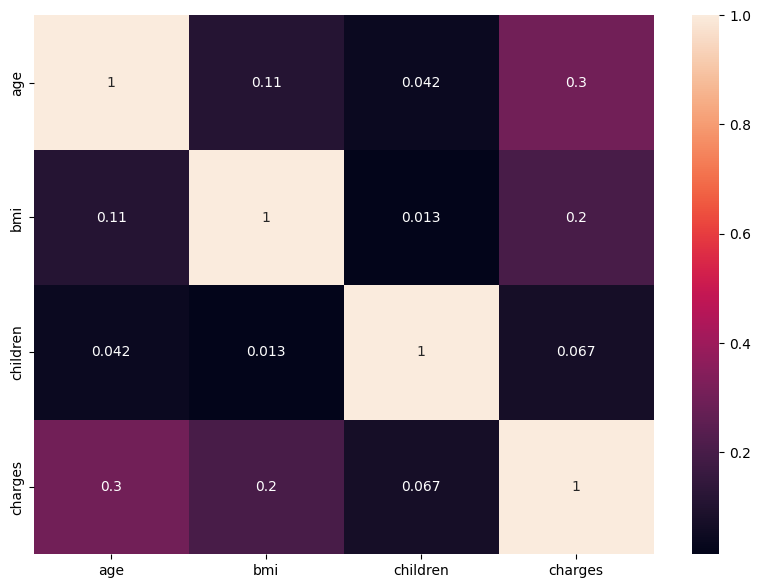

In [68]:
#correlation between features and target: original df
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

Were found outliers in the BMI and charges columns.
The target is left skewed.
Medium correlation between charges and age, charges and bmi.

In [69]:
#preprocessing
#convert categorical variables into numerical (0=no; 1=yes)
new_df = pd.get_dummies(df, columns=categorical, drop_first=True)
new_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


<AxesSubplot:>

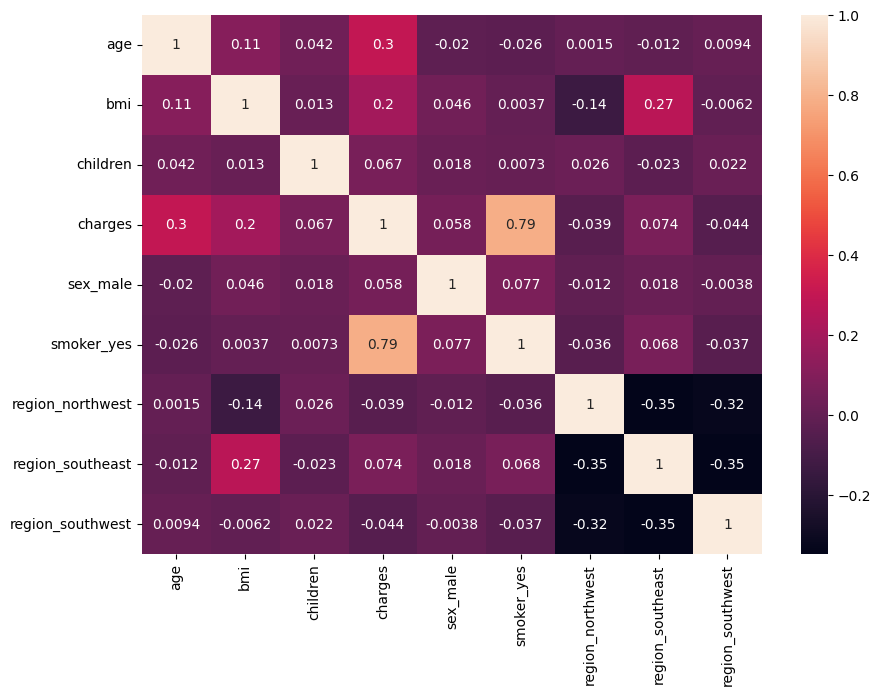

In [70]:
#correlation between features and target: new df
plt.figure(figsize=(10,7))
sns.heatmap(new_df.corr(), annot=True)

High correlation between charges and smoker_yes. Considerable correlation between charges and age, charges and bmi.

In [71]:
#selecting x and y
X = pd.DataFrame(new_df, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])
y = new_df['charges']

In [72]:
#train-test split
#x_train, x_test, y_train, y_text = train_test_split(x, y, test_size=0.3, random_state=0)

#https://www.kaggle.com/code/sadafpj/insurance-prediction-using-regression-regulation#step-8-|-LinearRegression

In [73]:
#scalling
#scaler = StandardScaler()
#scaler.fit(x_train)  
#scaled_x_train = scaler.transform(x_train)
#scaled_x_test = scaler.transform(x_test)

In [74]:
#linear regression model
#reg = LinearRegression()
#reg.fit(scaled_x_train, y_train)

In [75]:
#prediction
#y_pred = reg.predict(scaled_x_test)

In [83]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
#prediction
y_pred = reg.predict(X_test)
#check performance with R squared
reg.score(X_test, y_test)

0.7628682417769728

In [88]:
#linear regression model
reg = LinearRegression()
#cross-validation
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
print(np.mean(cv_results))

[0.76148609 0.70651382 0.77741544 0.73269494 0.7555821 ]
0.7467384760760102
